# python refresher

# 1. basic

## 1.1 lists and dicts

In [ ]:
mylist1 = []
for i in range(10):
    mylist1.append(i)

print(mylist1)

In [ ]:
mylist2 = [i for i in range(10)]
print(mylist2)

notice that in python indexing is done the CS way from 0 up to the specified number (not including that number!)
unlike how normal people think about indexing (and how it is done in R) 

notice that python lists are not equivalent to R vectors.
ny default python does not support vector opperations like in R.
this may be confusing for R users converting to python.


In [ ]:
mylist1 + mylist2

In [ ]:
mylist1 * mylist2

In [ ]:
my_dict = {}
my_dict ['exmple'] = "this is an example"
print(my_dict)

In [ ]:
my_dict = {
    "example": "this is an example"
}
print(my_dict)

notice that dictionaries have no notion of order.
there is no "first item" in a dictionary.

In [ ]:
my_dict[0]

# 2. numpy

In [27]:
import numpy as np

In [ ]:
my_array1 = np.array(mylist1)
my_array2 = np.array(mylist2)

In [ ]:
print(my_array1 + my_array2)
print(my_array1 * my_array2)
print(my_array1 @ my_array2)


In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print (a)
b = a[:2, 1:3]
print(b)

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   

In [ ]:
print(a)

to get around this feature we can use copy

In [ ]:
import copy

c = copy.copy(a[:2, 1:3])
c[0,0] = 2222
print(a[:2, 1:3])
print(c)

# 3. pandas

In [22]:
import pandas as pd

## 3.1 series

In [ ]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

In [ ]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

In [ ]:
cities['Chicago']

In [ ]:
cities[['Chicago', 'Portland', 'San Francisco']]

In [ ]:
cities[cities < 1000]

In [ ]:
# changing values using boolean logic
cities[cities < 1000] = 750
# changing based on the index
cities['Chicago'] = 1400

In [ ]:
print(cities.isnull())

In [ ]:
#filling missing values 
cities[cities.isnull()] = 1
print(cities)

## 3.2 data frames

In [16]:
#dataset source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
print(forestfires.shape)

(517, 13)


In [9]:
print(forestfires.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


## 3.3 Merge

Use the **`pandas.merge()`** static method to merge/join datasets in a [relational](http://en.wikipedia.org/wiki/Relational_database) manner. (See [DOC](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging))<br>
Like SQL's JOIN clause, `pandas.merge()` allows two DataFrames to be joined on one or more keys.

- parameter **`how`** : specify which keys are to be included in the resulting table
- parameters **`on, left_on, right_on, left_index, right_index`** : to specify the columns or indexes on which to join.

> `how` : {"inner", "left", "right", "outer"}

>    * "left" : use keys from left frame only
>    * "right" : use keys from right frame only
>    * "inner" (default) : use intersection of keys from both frames
>    * "outer" : use union of keys from both frames

There are several cases to consider which are very important to understand:
- **one-to-one** joins: to define these relationships, only one table is necessary (no join)
    - one user **has** one phone number
    - one phone number **belongs to** one user
- **one-to-many** joins: to define these relationships, two tables are necessary 
    - one post **has** many comments
    - one comment **belongs to** one post
        - merge(left, right, on=['key'], how='?')
- **many-to-many** joins: to define these relationships, three tables are necessary
    - one playlist **has** many songs
    - one song **belongs to** many playlists
        - merge(left.reset_index(), right.reset_index(), on=['key'], how='?').set_index(['key_left','key_right'])

Below are the different joins in SQL.

![joins](http://i.stack.imgur.com/VQ5XP.png)

In [14]:
#dataset source: https://www.cpsc.gov/cgibin/NEISSQuery/home.aspx
month = ['mar','oct', 'sep', 'oct', 'mar', 'jan']
day = ['fri','tue', 'sat', 'sun', 'sun', 'fri']
num_patients = [100, 274, 8, 73, 982, 1]

hospital = pd.DataFrame(list(zip(month,day,num_patients)), columns = ['month', 'day', 'num_patients'])
hospital.head()

,month,day,num_patients
0,mar,fri,100
1,oct,tue,274
2,sep,sat,8
3,oct,sun,73
4,mar,sun,982


In [20]:
print( pd.merge(forestfires, hospital, on='month', how='inner').head())

   X  Y month day_x  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area day_y  \
0  7  5   mar   fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   fri   
1  7  5   mar   fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   sun   
2  8  6   mar   fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   fri   
3  8  6   mar   fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   sun   
4  8  6   mar   sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   fri   

   num_patients  
0           100  
1           982  
2           100  
3           982  
4           100  


In [19]:
print( pd.merge(forestfires, hospital, on=['month', 'day'], how='inner').head())

   X  Y month  day  FFMC   DMC    DC   ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2  94.3   5.1   8.2  51   6.7   0.0   0.0   
1  8  6   mar  fri  91.7  33.3  77.5   9.0   8.3  97   4.0   0.2   0.0   
2  4  5   mar  fri  91.7  33.3  77.5   9.0  17.2  26   4.5   0.0   0.0   
3  4  5   mar  fri  91.2  48.3  97.8  12.5  15.8  27   7.6   0.0   0.0   
4  5  4   mar  fri  91.7  33.3  77.5   9.0  15.6  25   6.3   0.0   0.0   

   num_patients  
0           100  
1           100  
2           100  
3           100  
4           100  


In [21]:
print( pd.merge(forestfires, hospital, on=['month', 'day'], how='left').head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   num_patients  
0         100.0  
1         274.0  
2           NaN  
3         100.0  
4         982.0  


## 3.4 group

Use **`.groupby()`** method to execute the [split-apply-combine strategy](http://www.jstatsoft.org/v40/i01/paper) for data analysis :
1. **Split** the DataFrame into groups based on some criteria (DataFrameGroupBy or SeriesGroupBy)
2. **Apply** a function to each group independently
3. **Combine** the results into a data structure (DataFrame or Series)

![split-apply-combine-methodology](http://nbviewer.ipython.org/github/umddb/datascience-fall14/blob/master/lab3/img/splitApplyCombine.png)

**DataFrameGroupBy/SeriesGroupBy Methods** (See [Doc](http://pandas.pydata.org/pandas-docs/stable/api.html#function-application))
- `.apply()`: apply your own or another library's function or list of functions 
- `.agg()`: aggregate using input function or dict of {column: function}
- `.transform()`: transform 
- `.filter()`: return a copy of a DataFrame excluding elements from groups

<br>
In the apply step, we might wish to do one of the following:
- **Aggregation**: computing a summary statistic (or statistics) about each group. Some examples:
    - Compute group columns sums and means : 
        - `gby.agg([np.sum, np.mean])`
    - Compute group sizes and counts : 
        - `gby.agg([np.size, np.mean])`
- **Transformation**: perform some group-specific computations on every data point. Some examples:
    - Standardizing data (zscore) within group : 
        - `gby.transform(lambda x: (x - x.mean()) / x.std())`
    - Filling NAs within groups with a value derived from each group
        - `gby.fillna(x.mean())`
- **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:
    - Discarding data that belongs to groups with only a few members : 
        - `gby.filter(lambda x: x.size() > 100)`
    - Discarding data based on the group sum or mean
        - `gby.filter(lambda x: x['A'].sum() + x['B'].sum() > 0)`
    - Discarding data for missing data
        - `gby.dropna(axis=0)`


In [23]:
headers = ['name', 'title', 'department', 'salary']
df_chicago = pd.read_csv('city-of-chicago-salaries.csv',
                         names=headers)
print(df_chicago.head())

                    name                     title        department   salary
0        AARON,  ELVIA J          WATER RATE TAKER       WATER MGMNT  85512.0
1      AARON,  JEFFERY M            POLICE OFFICER            POLICE  75372.0
2    AARON,  KIMBERLEI R  CHIEF CONTRACT EXPEDITER  GENERAL SERVICES  80916.0
3    ABAD JR,  VICENTE M         CIVIL ENGINEER IV       WATER MGMNT  99648.0
4  ABBATACOLA,  ROBERT J       ELECTRICAL MECHANIC          AVIATION  89440.0


In [24]:
print(df_chicago.groupby('department').count().head(3), '\n') # NOT NULL records within each column
print(df_chicago.groupby('department').size().head(3)) # total records for each department

               name  title  salary
department                        
ADMIN HEARNG     42     42      42
ANIMAL CONTRL    61     61      61
AVIATION       1218   1218    1218 

department
ADMIN HEARNG       42
ANIMAL CONTRL      61
AVIATION         1218
dtype: int64


In [28]:
print(df_chicago.groupby('department').agg({'salary': [np.size, np.mean]}).head())

                   salary              
                     size          mean
department                             
ADMIN HEARNG         42.0  70336.857143
ANIMAL CONTRL        61.0  57121.455738
AVIATION           1218.0  70638.249130
BOARD OF ELECTION   110.0  55728.872727
BOARD OF ETHICS       9.0  81650.666667


In [29]:
df_mean_salaries = df_chicago.groupby('department').agg({'salary': [np.size, np.mean]}).reset_index()
print(df_mean_salaries.head())

          department  salary              
                        size          mean
0       ADMIN HEARNG    42.0  70336.857143
1      ANIMAL CONTRL    61.0  57121.455738
2           AVIATION  1218.0  70638.249130
3  BOARD OF ELECTION   110.0  55728.872727
4    BOARD OF ETHICS     9.0  81650.666667


In [30]:
df_mean_salaries_1 = df_chicago.groupby('department').agg({'salary': [np.size, np.mean]})

In [31]:
print(df_mean_salaries['salary'].head())

     size          mean
0    42.0  70336.857143
1    61.0  57121.455738
2  1218.0  70638.249130
3   110.0  55728.872727
4     9.0  81650.666667


In [32]:
print(df_mean_salaries_1['salary'].head())

                     size          mean
department                             
ADMIN HEARNG         42.0  70336.857143
ANIMAL CONTRL        61.0  57121.455738
AVIATION           1218.0  70638.249130
BOARD OF ELECTION   110.0  55728.872727
BOARD OF ETHICS       9.0  81650.666667


In [33]:
import matplotlib.pyplot as plt

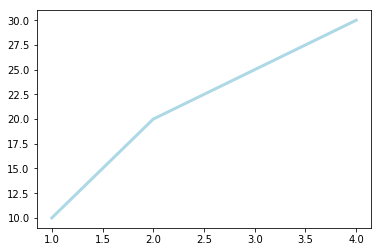

In [16]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)

In [ ]:
plt.show()

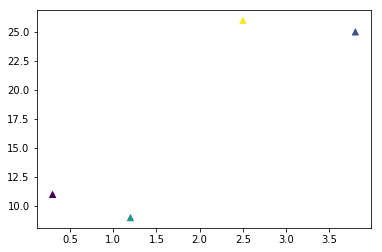

In [19]:
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.show()

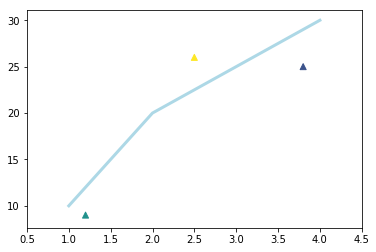

In [18]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)
plt.show()

## pandas + matplotlib

In [ ]:
df_mean_salaries['salary']['mean'].plot(kind='bar')